#Escalabilidade da multiplicação de matrizes
##Integrantes do grupo:  
João Vitor Fidelis Cardozo, RA: 769719;  
Rômulo Alves, RA: 757944.

Para esse trabalho, foi paralelizado de forma individual cada loop do laço for do código abaixo (externo, intermediário e interno), para ser possível estudar o desempenho e o efeito dessas paralelizações. Sendo assim, o código foi executado três (3) vezes para cada respectivo número de threads, sendo essas, 1, 2, 4, 8, 16, 32, 64 e, por último, 128. Foi gerada uma média aritmética e um desvio padrão para comparação entre esses resultados.

Primeiramente, foi paralelizado o loop externo e executado o programa com o tamanho 2048 definido para linhas, colunas e vetor de resultados. A resposta dessa simulação pode ser observada no campo abaixo do código.

In [ ]:
%%writefile mm_1.c 
/*
** PPD / DC/UFSCar - Helio
** Programa : multiplicacao de matrizes
** Objetivo: paralelizacao om OpenMP
*/

#include <math.h>
#include <stdlib.h> 
#include <string.h>
#include <stdio.h>
#include <unistd.h>
#include <time.h>
#include <omp.h>

float *A, *B, *C;


int
main(int argc, char *argv[])
{
	int lin_a,col_a,lin_b,col_b,lin_c,col_c;
	int i,j,k;
    
	double start;
	double end;

	unsigned int seedp = time(NULL);

	printf("Linhas A: ");   scanf("%d",&lin_a);
	printf("Colunas A / Linhas B: "); scanf("%d",&col_a);
	lin_b = col_a;
	printf("Colunas B: ");  scanf("%d",&col_b);
	printf("\n");
	lin_c = lin_a;
	col_c = col_b;

	// Alocacao dinâmica das matrizes, com linhas em sequência 
	A = (float *) malloc ( lin_a * col_a * sizeof(float) );
	B = (float *) malloc ( lin_b * col_b * sizeof(float) );
	C = (float *) malloc ( lin_c * col_c * sizeof(float) );

 	// Atribucao de valores iniciais às matrizes 
 	srand(time(NULL));

	// Opa! Vai gerar valores aleatórios em paralelo?
	// Talvez seja o caso de usar rand_r() ao invés de rand()...
  
	for(i=0; i < lin_a * col_a; i++) 
		// A[i]=(float)rand() / (float)RAND_MAX; 
        A[i] = rand_r(&seedp);

	for(i=0; i < lin_b * col_b; i++) 
        // B[i]=(float)rand() / (float)RAND_MAX; 
		B[i] = rand_r(&seedp);

	// calculo da multiplicacao
 
	// Qual/quais loop(s) paralelizar? Vale a pena paralelizar todos?
	// Qual é o efeito de fazer um parallel for em cada um dos fors abaixo?
	// É necessários sincronizar alguma operação, garantindo exclusão mútua?
	int aux = 0;

	start = omp_get_wtime();

	#pragma omp parallel for private (j, k) schedule(runtime) 
	for(i=0; i < lin_c; i++){
		for(j=0; j < col_c; j++){
			// pode ser útil usar uma variável auxiliar para os cálculos
			// C[i*col_c+j]=0;
			aux = 0;
			for(k=0; k < col_a; k++) 
				aux += A[i*col_a+k] * B[k*col_b+j];
			C[i*col_c+j] = aux;
			// C[i*col_c+j] = C[i*col_c+j] + A[i*col_a+k] * B[k*col_b+j];
	// ser usou variável auxiliar, atribui-se seu valor à C[i][j]
		}
	} 
	end = omp_get_wtime();
	//printf("Gerando valores aleatorios:%d", rand_r(&seedp));
	printf("Tempo gasto: %f \n", end-start);
	return(0);
}

Overwriting mm_1.c


In [ ]:
! echo "1024 1024 1024" > 1024
! echo "2048 2048 2048" > 2048
! echo "4096 4096 4096" > 4096

In [ ]:
! gcc mm_1.c -o mm_1 -Wall -O3 -fopenmp



In [ ]:
! for i in {1,2,4,8,16,32,64,128}; do for j in {1..3}; do echo "$j ª execução com $i thread(s)"; OMP_NUM_THREADS=$i ./mm_1 < 2048 ; done; echo; done

1 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 110.705863 
2 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 108.287257 
3 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 108.063928 

1 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 105.727224 
2 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 104.473918 
3 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 105.907914 

1 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 104.147428 
2 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 103.963373 
3 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 106.525262 

1 ª execução com 8 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 104.328658 
2 ª execução com 

Em seguida, foi paralelizado o loop intermediário e executado o programa com os mesmos parâmetros definidos anteriormente. A resposta dessa simulação pode ser observada no campo abaixo do código.



In [ ]:
%%writefile mm_2.c 
/*
** PPD / DC/UFSCar - Helio
** Programa : multiplicacao de matrizes
** Objetivo: paralelizacao om OpenMP
*/

#include <math.h>
#include <stdlib.h> 
#include <string.h>
#include <stdio.h>
#include <unistd.h>
#include <time.h>
#include <omp.h>

float *A, *B, *C;


int
main(int argc, char *argv[])
{
	int lin_a,col_a,lin_b,col_b,lin_c,col_c;
	int i,j,k;
    
	double start;
	double end;

  unsigned int seedp = time(NULL);

	printf("Linhas A: ");   scanf("%d",&lin_a);
	printf("Colunas A / Linhas B: "); scanf("%d",&col_a);
	lin_b = col_a;
	printf("Colunas B: ");  scanf("%d",&col_b);
	printf("\n");
	lin_c = lin_a;
	col_c = col_b;

	// Alocacao dinâmica das matrizes, com linhas em sequência 
	A = (float *) malloc ( lin_a * col_a * sizeof(float) );
	B = (float *) malloc ( lin_b * col_b * sizeof(float) );
	C = (float *) malloc ( lin_c * col_c * sizeof(float) );

 	// Atribucao de valores iniciais às matrizes 
 	srand(time(NULL));

	// Opa! Vai gerar valores aleatórios em paralelo?
	// Talvez seja o caso de usar rand_r() ao invés de rand()...
  
	for(i=0; i < lin_a * col_a; i++) 
		// A[i]=(float)rand() / (float)RAND_MAX; 
        A[i] = rand_r(&seedp);

	for(i=0; i < lin_b * col_b; i++) 
        // B[i]=(float)rand() / (float)RAND_MAX; 
		B[i] = rand_r(&seedp);

	// calculo da multiplicacao
 
	// Qual/quais loop(s) paralelizar? Vale a pena paralelizar todos?
	// Qual é o efeito de fazer um parallel for em cada um dos fors abaixo?
	// É necessários sincronizar alguma operação, garantindo exclusão mútua?
	int aux = 0;

	start = omp_get_wtime();

	for(i=0; i < lin_c; i++){
    #pragma omp parallel for private (k) schedule(runtime) 
		for(j=0; j < col_c; j++){
			// pode ser útil usar uma variável auxiliar para os cálculos
			// C[i*col_c+j]=0;
			aux = 0;
			for(k=0; k < col_a; k++) 
				aux += A[i*col_a+k] * B[k*col_b+j];
			C[i*col_c+j] = aux;
			// C[i*col_c+j] = C[i*col_c+j] + A[i*col_a+k] * B[k*col_b+j];
	// ser usou variável auxiliar, atribui-se seu valor à C[i][j]
		}
	} 
	end = omp_get_wtime();
	//printf("Gerando valores aleatorios:%d", rand_r(&seedp));
	printf("Tempo gasto: %f \n", end-start);
	return(0);
}

Overwriting mm_2.c


In [ ]:
! gcc mm_2.c -o mm_2 -Wall -O3 -fopenmp

In [ ]:
! for i in {1,2,4,8,16,32,64,128}; do for j in {1..3}; do echo "$j ª execução com $i thread(s)"; OMP_NUM_THREADS=$i ./mm_2 < 2048 ; done; echo; done

1 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 109.428623 
2 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 109.642193 
3 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 109.807955 

1 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 105.939883 
2 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 107.836511 
3 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 104.981946 

1 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 107.000210 
2 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 108.908836 
3 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 106.599444 

1 ª execução com 8 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 108.694439 
2 ª execução com 

Por último, foi paralelizado o loop interno e executado o programa com os mesmos parâmetros dos anteriores. A resposta dessa simulação pode ser observada no campo abaixo do código.

In [ ]:
%%writefile mm_3.c 
/*
** PPD / DC/UFSCar - Helio
** Programa : multiplicacao de matrizes
** Objetivo: paralelizacao om OpenMP
*/

#include <math.h>
#include <stdlib.h> 
#include <string.h>
#include <stdio.h>
#include <unistd.h>
#include <time.h>
#include <omp.h>

float *A, *B, *C;


int
main(int argc, char *argv[])
{
	int lin_a,col_a,lin_b,col_b,lin_c,col_c;
	int i,j,k;
    
	double start;
	double end;

  unsigned int seedp = time(NULL);

	printf("Linhas A: ");   scanf("%d",&lin_a);
	printf("Colunas A / Linhas B: "); scanf("%d",&col_a);
	lin_b = col_a;
	printf("Colunas B: ");  scanf("%d",&col_b);
	printf("\n");
	lin_c = lin_a;
	col_c = col_b;

	// Alocacao dinâmica das matrizes, com linhas em sequência 
	A = (float *) malloc ( lin_a * col_a * sizeof(float) );
	B = (float *) malloc ( lin_b * col_b * sizeof(float) );
	C = (float *) malloc ( lin_c * col_c * sizeof(float) );

 	// Atribucao de valores iniciais às matrizes 
 	srand(time(NULL));

	// Opa! Vai gerar valores aleatórios em paralelo?
	// Talvez seja o caso de usar rand_r() ao invés de rand()...
  
	for(i=0; i < lin_a * col_a; i++) 
		// A[i]=(float)rand() / (float)RAND_MAX; 
        A[i] = rand_r(&seedp);

	for(i=0; i < lin_b * col_b; i++) 
        // B[i]=(float)rand() / (float)RAND_MAX; 
		B[i] = rand_r(&seedp);

	// calculo da multiplicacao
 
	// Qual/quais loop(s) paralelizar? Vale a pena paralelizar todos?
	// Qual é o efeito de fazer um parallel for em cada um dos fors abaixo?
	// É necessários sincronizar alguma operação, garantindo exclusão mútua?
	int aux = 0;

	start = omp_get_wtime();

	for(i=0; i < lin_c; i++){
		for(j=0; j < col_c; j++){
			// pode ser útil usar uma variável auxiliar para os cálculos
			// C[i*col_c+j]=0;
			aux = 0;
			#pragma omp parallel for reduction(+ : aux) schedule(runtime) 
			for(k=0; k < col_a; k++) 
				aux += A[i*col_a+k] * B[k*col_b+j];
			C[i*col_c+j] = aux;
			// C[i*col_c+j] = C[i*col_c+j] + A[i*col_a+k] * B[k*col_b+j];
	// ser usou variável auxiliar, atribui-se seu valor à C[i][j]
		}
	} 
	end = omp_get_wtime();
	//printf("Gerando valores aleatorios:%d", rand_r(&seedp));
	printf("Tempo gasto: %f \n", end-start);
	return(0);
}

Writing mm_3.c


In [ ]:
! gcc mm_3.c -o mm_3 -Wall -O3 -fopenmp

In [ ]:
! for i in {1,2,4,8,16,32,64,128}; do for j in {1..3}; do echo "$j ª execução com $i thread(s)"; OMP_NUM_THREADS=$i ./mm_3 < 2048 ; done; echo; done

1 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 231.332775 
2 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 227.434800 
3 ª execução com 1 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 144.688373 

1 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 272.010538 
2 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 278.726340 
3 ª execução com 2 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 265.362903 

1 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 347.575022 
2 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 355.275284 
3 ª execução com 4 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 357.201631 

1 ª execução com 8 thread(s)
Linhas A: Colunas A / Linhas B: Colunas B: 
Tempo gasto: 548.064733 
2 ª execução com 

#Comparação de resultados:

Paralelização do loop externo:
*   Média aritmética
1.   1 thread: 109.01902
2.   2 threads: 105.36969    
3.   4 threads: 104.87869
4.   8 threads: 104.65806
5.   16 threads: 105.04621
6.   32 threads: 105.18834
7.   64 threads: 105.04645
8.   128 threads: 104.37474


*   Desvio padrão
1.   1 thread: 1.46511
2.   2 threads: 0.781
3.   4 threads: 1.42894
4.   8 threads: 0.6825
5.   16 threads: 1.02672
6.   32 threads: 1.19198
7.   64 threads: 0.7682
8.   128 threads: 0.93566

Paralelização do loop intermediário:
*   Média aritmética
1.   1 thread:109.62626
2.   2 threads:106.25278
3.   4 threads:107.50283
4.   8 threads:109.14728
5.   16 threads:109.97676
6.   32 threads:109.80301
7.   64 threads:110.07927
8.   128 threads:110.99938

*   Desvio padrão
1.   1 thread: 0.19017
2.   2 threads:1.45278
3.   4 threads:1.23401
4.   8 threads:0.44165
5.   16 threads:1.53191
6.   32 threads:1.47516
7.   64 threads:1.61111
8.  128 threads:1.48463

Paralelização do loop interno:
*   Média aritmética
1.   1 thread: 201.15198
2.   2 threads: 272.03326
2.   4 threads: 353.35065
3.   8 threads: 547.62662
4.   16 threads: 765.19665
5.   32 threads: 1202.74213
6.   64 threads: 1997.25591
7.   128 threads: 3499.27631

*   Desvio padrão
1.   1 thread: 48.93775
2.   2 threads: 6.68175
3.   4 threads: 5.09373
4.   8 threads: 7.02057
5.   16 threads: 7.01057
6.   32 threads: 10.5000
7.   64 threads: 33.79953
8.   128 threads: 54.57537


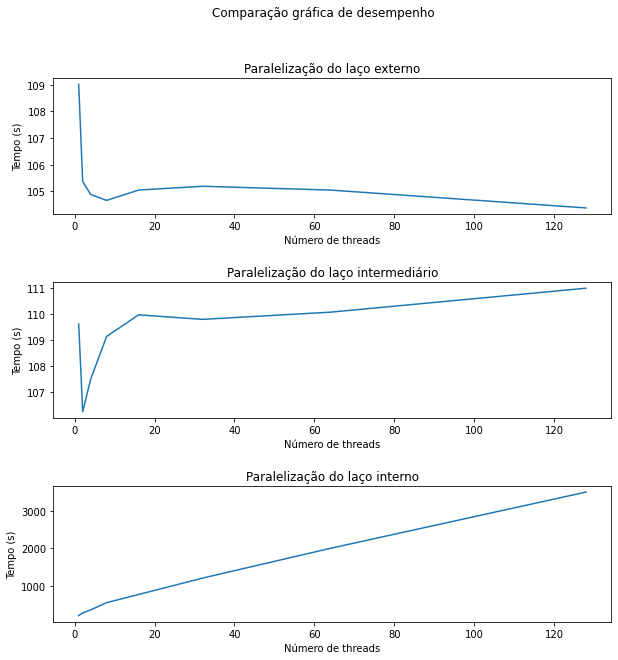

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, figsize=(10, 10))
fig.suptitle('Comparação gráfica de desempenho')
for ax in axs.flat:
  ax.set(xlabel='Número de threads', ylabel='Tempo (s)')


plt.subplots_adjust(hspace=0.5)

axs[0].title.set_text("Paralelização do laço externo")
axs[1].title.set_text("Paralelização do laço intermediário")
axs[2].title.set_text("Paralelização do laço interno")

axs[0].plot([1, 2, 4, 8, 16, 32, 64, 128], [109.01902, 105.36969, 104.87869, 104.65806, 105.04621, 105.18834, 105.04645, 104.37474])
axs[1].plot([1, 2, 4, 8, 16, 32, 64, 128], [109.62626, 106.25278, 107.50283, 109.14728, 109.97676, 109.80301, 110.07927, 110.99938])
axs[2].plot([1, 2, 4, 8, 16, 32, 64, 128], [201.15198, 272.03326, 353.35065, 547.62662, 765.19665, 1202.74213, 1997.25591, 3499.27631])

plt.show()

Analisando os resultados obtidos, foi possível concluir que o mais vantajoso é paralelizar apenas o loop externo (no caso da necessidade de paralelizar apenas um loop), visto que criar threads e abrir regiões paralelas é muito custoso em termos de tempo e processamento. Sendo assim, o menor número de regiões paralelas criadas ocorre quando o laço externo é paralelizado, pois esse, executa apenas 2048 vezes (tamanho definido para o número de linhas). Utilizando o gráfico como forma de análise, na paralelização do laço interno, é possível notar o crescimento quase exponencial do tempo conforme mais threads são alocadas para processar a multiplicação das matrizes.